# TrueFork 
##### Are guilty-pleasure dishes truly tastier?


**Name(s)**: Stephanie Anshell and Ved Panse

**Website Link**: https://stephaniepatriciaans.github.io/TrueFork/

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind

pd.options.plotting.backend = "plotly"

#### Set Up Paths

In [2]:
# Set up paths 
BASE_DIR = Path.cwd()
DATA_DIR = BASE_DIR / "Data"

In [3]:
print("Looking in:", DATA_DIR)
for f in sorted(DATA_DIR.iterdir()):
    print("  •", f.name)
print()

Looking in: /Users/stephanie/Desktop/DSC 80/TrueFork/Data
  • RAW_recipes.csv
  • interactions.csv



## Step 1: Introduction

### Data

In [4]:
# Data recipes
recipes = pd.read_csv('Data/RAW_recipes.csv')
recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13
...,...,...,...,...,...,...,...,...,...,...,...,...
83777,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
83778,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
83779,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
83780,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [5]:
# Data interactions
interactions = pd.read_csv('Data/interactions.csv')
interactions

,user_id,recipe_id,date,rating,review
0,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
1,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
2,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
3,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
4,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...
...,...,...,...,...,...
731922,2002357020,82303,2018-12-05,5,Delicious quick thick chocolate sauce with ing...
731923,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
731924,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
731925,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


## Step 2: Data Cleaning and Exploratory Data Analysis

In [6]:
# Value counts before replacement (including zeros)
print("Before replacement:")
print(interactions["rating"].value_counts(dropna=False))

Before replacement:
rating
5    523620
4    112393
0     51832
3     25054
1      9718
2      9310
Name: count, dtype: int64


### 2.1 Replace 0 rating --> NaN

In [7]:
interactions['rating'] = interactions['rating'].replace(0, np.nan)
print("\nAfter replacement:")
print(interactions["rating"].value_counts(dropna=False))


After replacement:
rating
5.0    523620
4.0    112393
NaN     51832
3.0     25054
1.0      9718
2.0      9310
Name: count, dtype: int64


In [8]:
# Display rows where rating = NaN
print("\nRows with rating = NaN:")
display(interactions[interactions["rating"].isna()].head())


Rows with rating = NaN:


,user_id,recipe_id,date,rating,review
3,124416,120345,2011-08-06,NaN,"Just an observation, so I will not rate. I fo..."
5,468945,134728,2008-02-20,NaN,Made my own buttermilk w/ vinegar and milk. U...
10,681408,225241,2008-03-14,NaN,This is a very good recipe. We also want to c...
20,2002068522,29093,2018-03-26,NaN,i made it and it was amazing
31,980899,79222,2010-10-18,NaN,"I used half cream and half 1% milk, added anot..."


##### **2.2 Average rating per recipe**

In [9]:
avg_ratings = interactions.groupby('recipe_id')['rating'].mean().rename('avg_rating')
avg_ratings

recipe_id
38        4.25
40        5.00
41        4.00
43        1.00
45        3.00
          ... 
537459    5.00
537485    5.00
537543     NaN
537671     NaN
537716    5.00
Name: avg_rating, Length: 185913, dtype: float64

##### **2.3 Merge recipes & average ratings**

In [10]:
merged = recipes.merge(avg_ratings, left_on='id', right_on='recipe_id', how='left')
merged

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,avg_rating
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9,4.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,5.0
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,5.0
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7,5.0
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83777,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,5.0
83778,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,5.0
83779,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,5.0
83780,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,1.0


##### **2.4 Parse the 'nutrition' column --> separate numeric fields**

In [11]:
def parse_nutrition(nutr_str):
    if pd.isna(nutr_str) or len(nutr_str) < 2:
        return [np.nan]*7
    nutrients = nutr_str.strip('[]').split(',')
    try:
        nutrients = [float(val.strip()) for val in nutrients]
    except:
        nutrients = [np.nan]*7
    return nutrients

In [12]:
nutrient_cols = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
nutrition_values = merged['nutrition'].apply(parse_nutrition).tolist()
nutrition_df = pd.DataFrame(nutrition_values, columns=nutrient_cols)
nutrition_df

,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,138.4,10.0,50.0,3.0,3.0,19.0,6.0
1,595.1,46.0,211.0,22.0,13.0,51.0,26.0
2,194.8,20.0,6.0,32.0,22.0,36.0,3.0
3,878.3,63.0,326.0,13.0,20.0,123.0,39.0
4,267.0,30.0,12.0,12.0,29.0,48.0,2.0
...,...,...,...,...,...,...,...
83777,415.2,26.0,34.0,26.0,44.0,21.0,15.0
83778,14.8,0.0,2.0,58.0,1.0,0.0,1.0
83779,59.2,6.0,2.0,3.0,6.0,5.0,0.0
83780,188.0,11.0,57.0,11.0,7.0,21.0,9.0


##### **2.5 Cleaned Data**

In [13]:
# Concatenate nutritional info back to merged dataset
cleaned = pd.concat([merged, nutrition_df], axis=1)
cleaned

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,avg_rating,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9,4.0,138.4,10.0,50.0,3.0,3.0,19.0,6.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,5.0,595.1,46.0,211.0,22.0,13.0,51.0,26.0
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,5.0,194.8,20.0,6.0,32.0,22.0,36.0,3.0
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7,5.0,878.3,63.0,326.0,13.0,20.0,123.0,39.0
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,5.0,267.0,30.0,12.0,12.0,29.0,48.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83777,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,5.0,415.2,26.0,34.0,26.0,44.0,21.0,15.0
83778,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,5.0,14.8,0.0,2.0,58.0,1.0,0.0,1.0
83779,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,5.0,59.2,6.0,2.0,3.0,6.0,5.0,0.0
83780,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,1.0,188.0,11.0,57.0,11.0,7.0,21.0,9.0


In [14]:
# Drop recipes without any valid average rating
cleaned = cleaned.dropna(subset=["avg_rating"]).reset_index(drop=True)
cleaned

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,avg_rating,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9,4.0,138.4,10.0,50.0,3.0,3.0,19.0,6.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,5.0,595.1,46.0,211.0,22.0,13.0,51.0,26.0
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,5.0,194.8,20.0,6.0,32.0,22.0,36.0,3.0
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7,5.0,878.3,63.0,326.0,13.0,20.0,123.0,39.0
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,5.0,267.0,30.0,12.0,12.0,29.0,48.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81168,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,5.0,415.2,26.0,34.0,26.0,44.0,21.0,15.0
81169,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,5.0,14.8,0.0,2.0,58.0,1.0,0.0,1.0
81170,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,5.0,59.2,6.0,2.0,3.0,6.0,5.0,0.0
81171,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,1.0,188.0,11.0,57.0,11.0,7.0,21.0,9.0


In [15]:
# Cleaned DataFrame
print("Cleaned Dataset Preview:")
display(cleaned[['id', 'name', 'minutes', 'avg_rating', 'calories', 'sugar', 'total_fat', 'protein', 'carbohydrates']].head(), "\n")

Cleaned Dataset Preview:


,id,name,minutes,avg_rating,calories,sugar,total_fat,protein,carbohydrates
0,333281,1 brownies in the world best ever,40,4.0,138.4,50.0,10.0,3.0,6.0
1,453467,1 in canada chocolate chip cookies,45,5.0,595.1,211.0,46.0,13.0,26.0
2,306168,412 broccoli casserole,40,5.0,194.8,6.0,20.0,22.0,3.0
3,286009,millionaire pound cake,120,5.0,878.3,326.0,63.0,20.0,39.0
4,475785,2000 meatloaf,90,5.0,267.0,12.0,30.0,29.0,2.0


'\n'

##### **2.6 Summary Statistics**

In [16]:
numeric_cols = ['minutes', 'avg_rating', 'calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
print("Summary Statistics:")
display(cleaned[numeric_cols].describe())

Summary Statistics:


,minutes,avg_rating,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
count,8.117300e+04,81173.000000,81173.000000,81173.000000,81173.000000,81173.000000,81173.000000,81173.000000,81173.000000
mean,1.113769e+02,4.625363,427.191020,32.399566,67.814261,28.952595,33.093295,39.954431,13.676358
std,4.020670e+03,0.640763,631.448133,59.592934,246.103141,146.917635,51.005193,80.494451,28.575730
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+01,4.500000,171.200000,8.000000,9.000000,5.000000,6.000000,6.000000,4.000000
50%,3.500000e+01,5.000000,304.600000,20.000000,23.000000,14.000000,18.000000,21.000000,9.000000
75%,6.000000e+01,5.000000,496.600000,39.000000,61.000000,32.000000,49.000000,49.000000,16.000000
max,1.051200e+06,5.000000,45609.000000,3464.000000,30260.000000,29338.000000,4356.000000,6875.000000,3007.000000


##### **2.7 Plot: Distribution of Average Ratings**

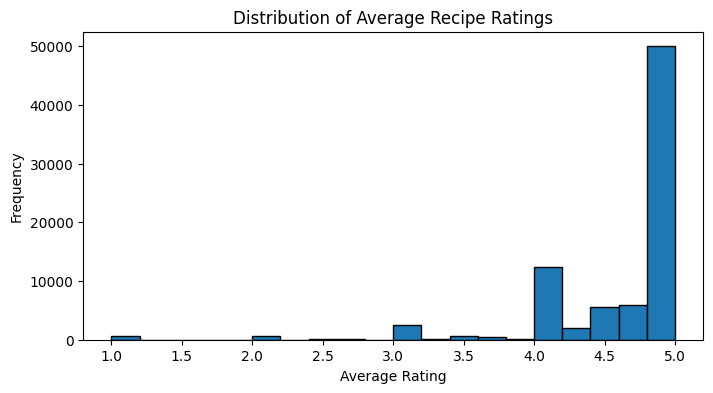

In [17]:
plt.figure(figsize=(8, 4))
plt.hist(cleaned['avg_rating'], bins=20, edgecolor='black')
plt.title('Distribution of Average Recipe Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

##### **2.8 Plot: Distribution of Calories**

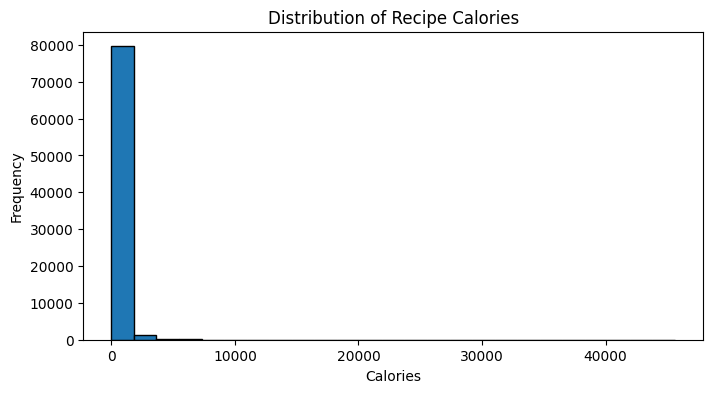

In [18]:
plt.figure(figsize=(8, 4))
plt.hist(cleaned['calories'].dropna(), bins=25, edgecolor='black')
plt.title('Distribution of Recipe Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

##### **2.9 Plot: Preparation Time vs. Average Rating**

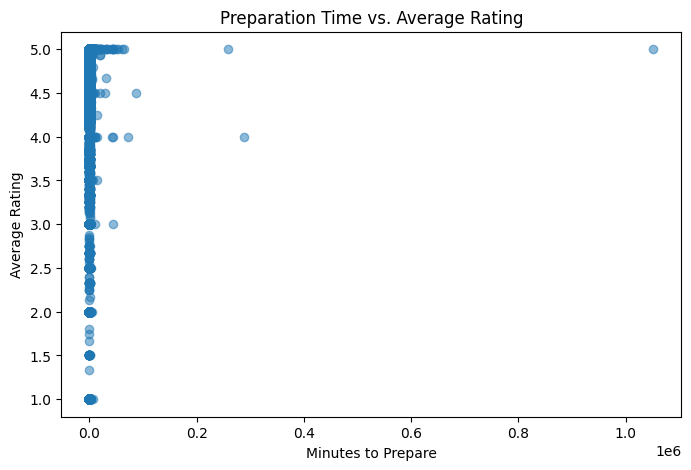

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(cleaned['minutes'], cleaned['avg_rating'], alpha=0.5)
plt.title('Preparation Time vs. Average Rating')
plt.xlabel('Minutes to Prepare')
plt.ylabel('Average Rating')
plt.show()

## Step 3: Assessment of Missingness

In [20]:
missing_summary = cleaned[numeric_cols + ["name", "tags"]].isna().mean().round(4) * 100
print("Percentage Missing per Column:")
display(missing_summary)

Percentage Missing per Column:


minutes          0.0
avg_rating       0.0
calories         0.0
total_fat        0.0
sugar            0.0
sodium           0.0
protein          0.0
saturated_fat    0.0
carbohydrates    0.0
name             0.0
tags             0.0
dtype: float64

In [21]:
# Drop any rows where nutrition fields are NaN
clean_no_missing = cleaned.dropna(subset=nutrient_cols).reset_index(drop=True)
print("\nAfter dropping nutrition-missing rows:", clean_no_missing.shape[0], "recipes remain")


After dropping nutrition-missing rows: 81173 recipes remain


## Step 4: Hypothesis Testing

##### **4.1 Define 'healthy' vs 'unhealthy' based on median calories**

In [22]:
median_cal = clean_no_missing["calories"].median()
median_cal

np.float64(304.6)

In [23]:
clean_no_missing["is_healthy"] = (clean_no_missing["calories"] <= median_cal).astype(int)
clean_no_missing["is_healthy"]

0        1
1        0
2        1
3        0
4        1
        ..
81168    0
81169    1
81170    1
81171    1
81172    1
Name: is_healthy, Length: 81173, dtype: int64

In [24]:
grouped_stats = clean_no_missing.groupby("is_healthy")["avg_rating"].agg(["count", "mean", "std"])
print("Group-wise stats (healthy=1, unhealthy=0):")
display(grouped_stats)

Group-wise stats (healthy=1, unhealthy=0):


,count,mean,std
is_healthy,,,
0,40574,4.621161,0.637666
1,40599,4.629563,0.643825


##### **4.2 Two-Sample t-Test**

In [25]:
healthy_ratings   = clean_no_missing.loc[clean_no_missing["is_healthy"] == 1, "avg_rating"]
healthy_ratings

0        4.0
2        5.0
4        5.0
5        4.0
6        5.0
        ... 
81167    5.0
81169    5.0
81170    5.0
81171    1.0
81172    3.0
Name: avg_rating, Length: 40599, dtype: float64

In [26]:
unhealthy_ratings = clean_no_missing.loc[clean_no_missing["is_healthy"] == 0, "avg_rating"]
unhealthy_ratings

1        5.0
3        5.0
7        5.0
8        5.0
9        5.0
        ... 
81159    5.0
81161    3.0
81162    5.0
81165    5.0
81168    5.0
Name: avg_rating, Length: 40574, dtype: float64

In [27]:
t_stat, p_val = ttest_ind(healthy_ratings, unhealthy_ratings, equal_var=False)
print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

t-statistic = 1.8680, p-value = 0.0618


## Step 5: Framing a Prediction Problem

#### **5.1. Binary classification:**
- high_rating = 1 if avg_rating ≥ 4.5 
- high_rating = 0 otherwise

In [28]:
clean_no_missing["high_rating"] = (clean_no_missing["avg_rating"] >= 4.5).astype(int)
clean_no_missing["high_rating"].value_counts(normalize=True)

high_rating
1    0.750804
0    0.249196
Name: proportion, dtype: float64

#### **5.2 One-Hot Encode Top 10 Tags**

In [29]:
clean_no_missing["tag_list"] = clean_no_missing["tags"].str.strip("[]").str.replace("'", "").str.split(", ")
clean_no_missing["tag_list"]

0        [60-minutes-or-less, time-to-make, course, mai...
1        [60-minutes-or-less, time-to-make, cuisine, pr...
2        [60-minutes-or-less, time-to-make, course, mai...
3        [time-to-make, course, cuisine, preparation, o...
4        [time-to-make, course, main-ingredient, prepar...
                               ...                        
81168    [ham, 60-minutes-or-less, time-to-make, course...
81169    [15-minutes-or-less, time-to-make, course, pre...
81170    [60-minutes-or-less, time-to-make, course, mai...
81171    [30-minutes-or-less, time-to-make, course, pre...
81172    [30-minutes-or-less, time-to-make, course, pre...
Name: tag_list, Length: 81173, dtype: object

In [30]:
all_tags = clean_no_missing.explode("tag_list")["tag_list"].value_counts()
all_tags

tag_list
preparation                       80525
time-to-make                      77504
course                            74535
main-ingredient                   55188
dietary                           47674
                                  ...  
bean-soup                             1
ham-and-bean-soup                     1
for-large-groups-holiday-event        1
stews-poultry                         1
octopus                               1
Name: count, Length: 544, dtype: int64

In [31]:
top_10_tags = all_tags.head(10).index.tolist()
top_10_tags

['preparation',
 'time-to-make',
 'course',
 'main-ingredient',
 'dietary',
 'easy',
 'occasion',
 'cuisine',
 'low-in-something',
 '60-minutes-or-less']

In [32]:
for tag in top_10_tags:
    clean_no_missing[f"tag_{tag}"] = clean_no_missing["tag_list"].apply(lambda lst: int(tag in lst))

In [33]:
# Display class balance
print("High rating distribution:")
display(clean_no_missing["high_rating"].value_counts(normalize=True))

High rating distribution:


high_rating
1    0.750804
0    0.249196
Name: proportion, dtype: float64

## Step 6: Baseline Model

#### **6.1. Train-test split (80/20):**

In [34]:
np.random.seed(42)
shuffled_idx = np.random.permutation(len(clean_no_missing))
n_train = int(0.8 * len(shuffled_idx))
train_idx = shuffled_idx[:n_train]
test_idx  = shuffled_idx[n_train:]

train_df = clean_no_missing.iloc[train_idx].reset_index(drop=True)
test_df  = clean_no_missing.iloc[test_idx].reset_index(drop=True)

print(f"Training set size: {len(train_df)}, Test set size: {len(test_df)}")

Training set size: 64938, Test set size: 16235


#### **6.2. Majority-class baseline**

In [35]:
most_freq_label = train_df["high_rating"].mode()[0]
test_df["pred_baseline"] = most_freq_label

#### **6.3. Compute confusion matrix elements**

In [36]:
y_true = test_df["high_rating"].values
y_pred = test_df["pred_baseline"].values
TP = ((y_true == 1) & (y_pred == 1)).sum()
FP = ((y_true == 0) & (y_pred == 1)).sum()
FN = ((y_true == 1) & (y_pred == 0)).sum()
TN = ((y_true == 0) & (y_pred == 0)).sum()

#### **6.4. Metrics**

In [37]:
accuracy = (TP + TN) / len(y_true)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
recall    = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1_score  = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0

print("Baseline Performance:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1_score:.4f}")

Baseline Performance:
  Accuracy:  0.7503
  Precision: 0.7503
  Recall:    1.0000
  F1-score:  0.8573


## Step 7: Final Model

In [38]:
import statsmodels.api as sm

#### **7.1. Features and target**

In [39]:
numeric_features = ["minutes"] + nutrient_cols
numeric_features

['minutes',
 'calories',
 'total_fat',
 'sugar',
 'sodium',
 'protein',
 'saturated_fat',
 'carbohydrates']

In [40]:
tag_features = [f"tag_{t}" for t in top_10_tags]
tag_features

['tag_preparation',
 'tag_time-to-make',
 'tag_course',
 'tag_main-ingredient',
 'tag_dietary',
 'tag_easy',
 'tag_occasion',
 'tag_cuisine',
 'tag_low-in-something',
 'tag_60-minutes-or-less']

In [41]:
X = clean_no_missing[numeric_features + tag_features]
X

,minutes,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,tag_preparation,tag_time-to-make,tag_course,tag_main-ingredient,tag_dietary,tag_easy,tag_occasion,tag_cuisine,tag_low-in-something,tag_60-minutes-or-less
0,40,138.4,10.0,50.0,3.0,3.0,19.0,6.0,1,1,1,1,0,0,0,0,0,1
1,45,595.1,46.0,211.0,22.0,13.0,51.0,26.0,1,1,0,0,0,0,0,1,0,1
2,40,194.8,20.0,6.0,32.0,22.0,36.0,3.0,1,1,1,1,0,1,0,0,0,1
3,120,878.3,63.0,326.0,13.0,20.0,123.0,39.0,1,1,1,0,1,0,1,1,1,0
4,90,267.0,30.0,12.0,12.0,29.0,48.0,2.0,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81168,60,415.2,26.0,34.0,26.0,44.0,21.0,15.0,1,1,1,1,0,1,0,1,0,1
81169,5,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1,1,1,0,1,1,0,0,0,0
81170,40,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1,1,1,1,0,1,0,0,0,1
81171,29,188.0,11.0,57.0,11.0,7.0,21.0,9.0,1,1,1,0,1,0,0,0,0,0


In [42]:
y = clean_no_missing["high_rating"]
y

0        0
1        1
2        1
3        1
4        1
        ..
81168    1
81169    1
81170    1
81171    0
81172    0
Name: high_rating, Length: 81173, dtype: int64

In [43]:
# Add constant for intercept
X_const = sm.add_constant(X)
X_const

,const,minutes,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,tag_preparation,tag_time-to-make,tag_course,tag_main-ingredient,tag_dietary,tag_easy,tag_occasion,tag_cuisine,tag_low-in-something,tag_60-minutes-or-less
0,1.0,40,138.4,10.0,50.0,3.0,3.0,19.0,6.0,1,1,1,1,0,0,0,0,0,1
1,1.0,45,595.1,46.0,211.0,22.0,13.0,51.0,26.0,1,1,0,0,0,0,0,1,0,1
2,1.0,40,194.8,20.0,6.0,32.0,22.0,36.0,3.0,1,1,1,1,0,1,0,0,0,1
3,1.0,120,878.3,63.0,326.0,13.0,20.0,123.0,39.0,1,1,1,0,1,0,1,1,1,0
4,1.0,90,267.0,30.0,12.0,12.0,29.0,48.0,2.0,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81168,1.0,60,415.2,26.0,34.0,26.0,44.0,21.0,15.0,1,1,1,1,0,1,0,1,0,1
81169,1.0,5,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1,1,1,0,1,1,0,0,0,0
81170,1.0,40,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1,1,1,1,0,1,0,0,0,1
81171,1.0,29,188.0,11.0,57.0,11.0,7.0,21.0,9.0,1,1,1,0,1,0,0,0,0,0


In [44]:
# Split using the same indices as baseline
X_train = X_const.iloc[train_idx]
X_train

,const,minutes,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,tag_preparation,tag_time-to-make,tag_course,tag_main-ingredient,tag_dietary,tag_easy,tag_occasion,tag_cuisine,tag_low-in-something,tag_60-minutes-or-less
43385,1.0,20,558.9,40.0,251.0,14.0,31.0,56.0,22.0,1,1,1,0,1,1,0,1,0,0
22143,1.0,50,251.1,21.0,12.0,8.0,14.0,39.0,8.0,1,1,1,1,0,0,1,1,0,1
57323,1.0,35,263.4,20.0,13.0,1.0,8.0,16.0,11.0,1,1,1,1,1,1,0,0,1,1
16750,1.0,40,383.1,13.0,145.0,67.0,62.0,7.0,16.0,1,1,1,1,1,0,1,1,1,1
46017,1.0,10,323.9,55.0,1.0,0.0,0.0,24.0,0.0,1,1,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22144,1.0,75,1002.0,68.0,22.0,34.0,96.0,101.0,31.0,1,1,1,1,0,1,1,0,0,0
12920,1.0,15,62.0,7.0,8.0,0.0,2.0,3.0,1.0,1,1,1,1,1,1,0,0,0,0
38270,1.0,50,351.3,43.0,10.0,34.0,32.0,59.0,2.0,1,1,1,0,1,1,0,0,1,1
66816,1.0,24,847.5,115.0,12.0,14.0,71.0,139.0,2.0,1,1,1,0,0,1,0,0,0,0


In [45]:
y_train = y.iloc[train_idx]
y_train

43385    1
22143    0
57323    1
16750    1
46017    1
        ..
22144    1
12920    1
38270    1
66816    1
5995     1
Name: high_rating, Length: 64938, dtype: int64

In [46]:
X_test  = X_const.iloc[test_idx]
X_test

,const,minutes,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,tag_preparation,tag_time-to-make,tag_course,tag_main-ingredient,tag_dietary,tag_easy,tag_occasion,tag_cuisine,tag_low-in-something,tag_60-minutes-or-less
79357,1.0,15,191.7,0.0,189.0,0.0,2.0,0.0,16.0,1,1,1,0,0,1,1,1,0,0
74483,1.0,20,684.6,36.0,18.0,13.0,52.0,52.0,29.0,1,1,1,1,1,1,1,1,1,0
29530,1.0,37,238.4,24.0,6.0,11.0,41.0,40.0,1.0,1,1,1,1,0,0,1,1,0,1
27641,1.0,30,224.5,28.0,13.0,2.0,10.0,57.0,3.0,1,1,1,1,1,1,1,0,0,0
9182,1.0,5,287.9,26.0,97.0,7.0,10.0,48.0,10.0,1,1,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1.0,2,460.5,21.0,132.0,7.0,29.0,43.0,25.0,1,1,1,1,1,1,1,0,1,0
54886,1.0,65,126.9,3.0,8.0,8.0,7.0,2.0,7.0,1,1,1,1,1,1,0,0,1,0
76820,1.0,45,1232.3,147.0,18.0,13.0,167.0,174.0,2.0,1,1,1,1,0,1,1,1,0,1
860,1.0,19,275.6,4.0,0.0,8.0,107.0,3.0,0.0,1,1,1,1,0,1,0,0,0,0


In [47]:
y_test  = y.iloc[test_idx]
y_test

79357    1
74483    1
29530    1
27641    0
9182     0
        ..
6265     1
54886    1
76820    1
860      1
15795    1
Name: high_rating, Length: 16235, dtype: int64

#### **7.2. Predict probabilities and labels**

In [48]:
logit_model = sm.Logit(y_train, X_train).fit(disp=False)
logit_model

In [49]:
y_prob = logit_model.predict(X_test)
y_pred_lr = (y_prob >= 0.5).astype(int)
y_pred_lr

79357    1
74483    1
29530    1
27641    1
9182     1
        ..
6265     1
54886    1
76820    1
860      1
15795    1
Length: 16235, dtype: int64

#### **7.3. Compute Confusion Metric elements**

In [50]:
TP = ((y_test == 1) & (y_pred_lr == 1)).sum()
FP = ((y_test == 0) & (y_pred_lr == 1)).sum()
FN = ((y_test == 1) & (y_pred_lr == 0)).sum()
TN = ((y_test == 0) & (y_pred_lr == 0)).sum()

#### **7.4. Metrics**

In [51]:
accuracy = (TP + TN) / len(y_test)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
recall    = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1_score  = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0

print("Logistic Regression Performance:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1_score:.4f}")

Logistic Regression Performance:
  Accuracy:  0.7500
  Precision: 0.7502
  Recall:    0.9996
  F1-score:  0.8571


#### **7.5 Display top coefficients**

In [52]:
# Display top coefficients
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": logit_model.params
}).sort_values(by="coefficient", ascending=False)
print("\nTop positive coefficients:")
display(coef_df.head(10))
print("\nTop negative coefficients:")
display(coef_df.tail(10))


Top positive coefficients:


,feature,coefficient
const,const,1.366878
tag_time-to-make,tag_time-to-make,0.430564
tag_cuisine,tag_cuisine,0.127048
tag_occasion,tag_occasion,0.087316
tag_low-in-something,tag_low-in-something,0.084176
tag_main-ingredient,tag_main-ingredient,0.010204
saturated_fat,saturated_fat,0.000403
calories,calories,0.000370
sugar,sugar,0.000253
sodium,sodium,0.000180



Top negative coefficients:


,feature,coefficient
sodium,sodium,1.798478e-04
minutes,minutes,5.590100e-07
total_fat,total_fat,-1.385092e-03
tag_easy,tag_easy,-1.724375e-03
protein,protein,-2.256668e-03
carbohydrates,carbohydrates,-6.762730e-03
tag_60-minutes-or-less,tag_60-minutes-or-less,-1.175296e-01
tag_dietary,tag_dietary,-1.247268e-01
tag_course,tag_course,-1.461537e-01
tag_preparation,tag_preparation,-5.361182e-01


## Step 8: Fairness Analysis

In [53]:
results = []

for tag in top_10_tags + ["no_tag"]:
    if tag != "no_tag":
        idx = X_test[f"tag_{tag}"] == 1
        group_name = tag
    else:
        # “no_tag” means none of the top_10 tags are present
        idx = (X_test[tag_features].sum(axis=1) == 0)
        group_name = "no_tag"
    
    n_recipes = idx.sum()
    if n_recipes == 0:
        continue
    
    # True labels and predicted labels for this group
    y_true_grp = y_test[idx].values
    y_pred_grp = np.array(y_pred_lr)[idx.values]
    
    # Compute confusion matrix elements
    TP = np.logical_and(y_true_grp == 1, y_pred_grp == 1).sum()
    FP = np.logical_and(y_true_grp == 0, y_pred_grp == 1).sum()
    FN = np.logical_and(y_true_grp == 1, y_pred_grp == 0).sum()
    TN = np.logical_and(y_true_grp == 0, y_pred_grp == 0).sum()
    
    # Compute metrics
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall    = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    
    results.append({
        "tag": group_name,
        "n_recipes": n_recipes,
        "accuracy": round(accuracy, 4),
        "precision": round(precision, 4),
        "recall": round(recall, 4)
    })

fairness_df = pd.DataFrame(results).sort_values("n_recipes", ascending=False).reset_index(drop=True)
print("Group-wise performance:")
print(fairness_df)

Group-wise performance:
                   tag  n_recipes  accuracy  precision  recall
0          preparation      16114    0.7499     0.7501  0.9996
1         time-to-make      15483    0.7522     0.7525  0.9996
2               course      14926    0.7490     0.7493  0.9996
3      main-ingredient      10898    0.7497     0.7499  0.9996
4              dietary       9469    0.7502     0.7504  0.9997
5                 easy       8951    0.7519     0.7521  0.9996
6             occasion       6997    0.7573     0.7574  0.9998
7              cuisine       6142    0.7623     0.7623  1.0000
8     low-in-something       5718    0.7520     0.7521  0.9998
9   60-minutes-or-less       4892    0.7430     0.7432  0.9997
10              no_tag         18    0.8333     0.8333  1.0000
